<a href="https://colab.research.google.com/github/argyaWicaksana/PCVK-College/blob/main/week7_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Membuat fungsi konvolusi tanpa library

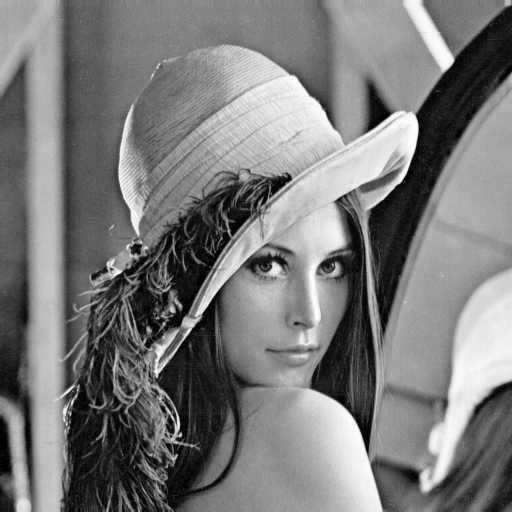

In [ ]:
image = cv.imread('/content/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv2_imshow(image)

In [ ]:
def convolution2d(image, kernel, stride, padding):
  # Get the dimensions of the image and kernel
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape

  # Pad the image with zeros to account for the kernel size.
  padded_image = np.zeros((image_height + kernel_height - 1, image_width + kernel_width - 1))
  padded_image[kernel_height // padding:image_height + kernel_height // padding, kernel_width // padding:image_width + kernel_width // padding] = image

  # Convolve the image with the kernel.
  convolved_image = np.zeros((image_height, image_width))
  for i in range(image_height):
    for j in range(image_width):
      convolved_image[i, j] = np.sum(padded_image[i*stride:i*stride + kernel_height, j*stride:j*stride + kernel_width] * kernel)

  return convolved_image

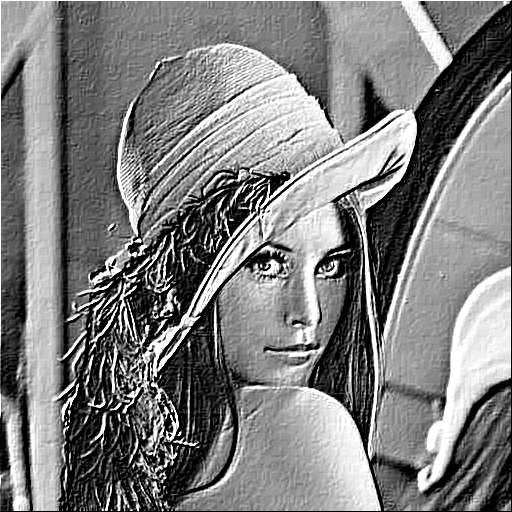

In [ ]:
kernel = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])

convolved_image = convolution2d(image, kernel, 1, 2)



cv2_imshow(convolved_image)

Sharpen filter

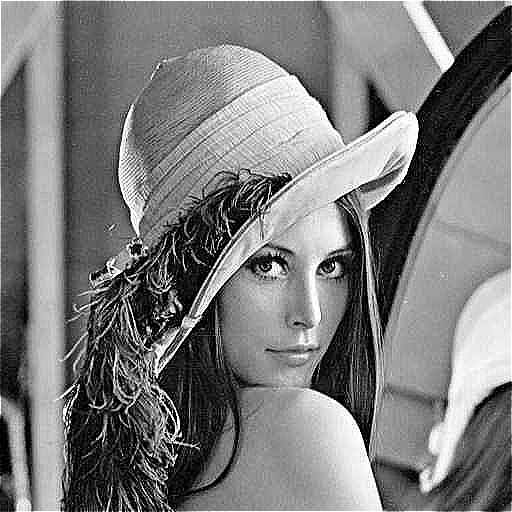

In [ ]:
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

convolved_image = convolution2d(image, kernel, 1, 2)

cv2_imshow(convolved_image)

Emboss filter

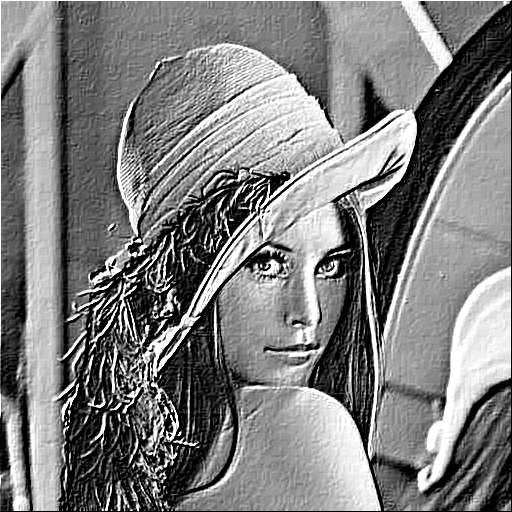

In [ ]:
kernel = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])

convolved_image = convolution2d(image, kernel, 1, 2)



cv2_imshow(convolved_image)

Left Sobel Edge Detection

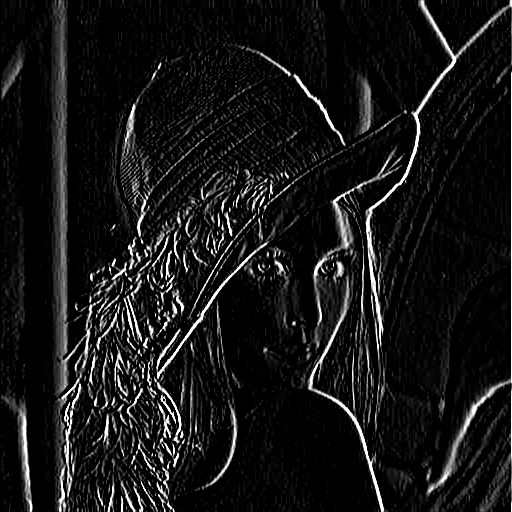

In [ ]:
kernel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

convolved_image = convolution2d(image, kernel, 1, 2)

cv2_imshow(convolved_image)

Canny Edge Detection (Laplacian)

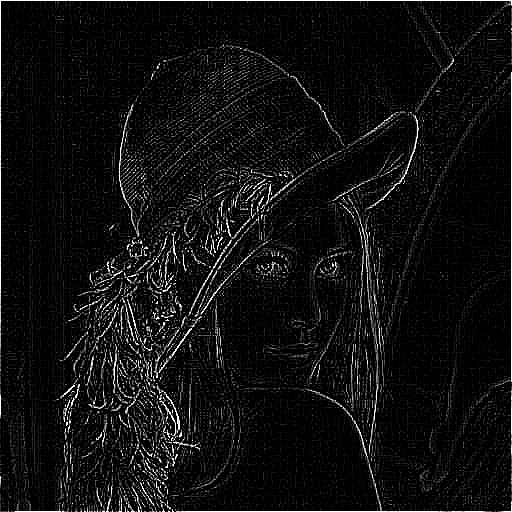

In [ ]:
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

convolved_image = convolution2d(image, kernel, 1, 2)

cv2_imshow(convolved_image)

Prewitt Edge Detection

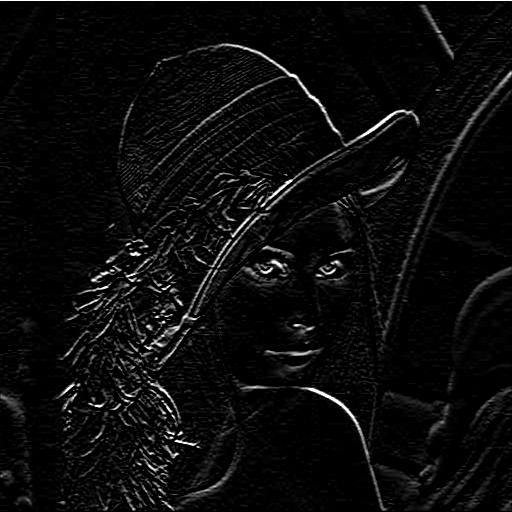

In [ ]:
kernel = np.array([[-1, -1, -1],
                    [0, 0, 0],
                    [1, 1, 1]])

convolved_image = convolution2d(image, kernel, 1, 2)

cv2_imshow(convolved_image)

5x5 Gaussian Blur

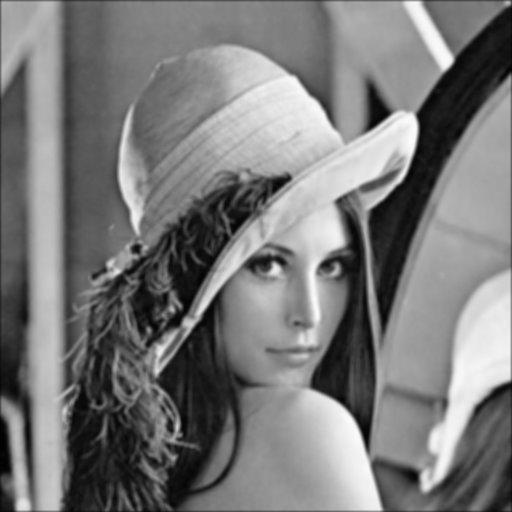

In [ ]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

convolved_image = convolution2d(image, gauss_kernel, 1, 2)

cv2_imshow(convolved_image)

21x21 Gaussian Blur

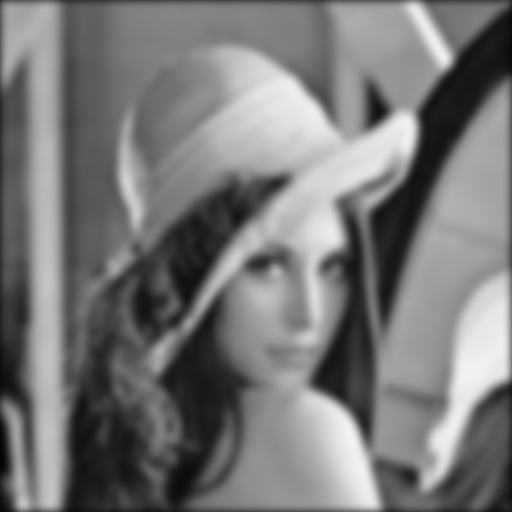

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

convolved_image = convolution2d(image, gauss_kernel, 1, 2)

cv2_imshow(convolved_image)